# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [53]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn import under_sampling

# carregando dados
data = pd.read_csv("./dados/pib_mba_avaliacao2024.csv")
data

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
0,1406,1,RIO GRANDE DO SUL,Igrejinha,2010.0,6.907114e+05,33551,20586.910156,2,5.1,21976,1121
1,4252,2,RIO GRANDE DO SUL,Três Coroas,2010.0,4.102403e+05,24786,16551.289062,2,4.8,17350,833
2,998,3,RIO GRANDE DO SUL,Canoas,2010.0,1.644448e+07,332056,49523.199219,3,4.6,202554,9317
3,4292,4,RIO GRANDE DO SUL,Sapucaia do Sul,2010.0,1.767158e+06,126316,13989.980469,2,4.5,88421,3979
4,991,5,RIO GRANDE DO SUL,São Leopoldo,2010.0,3.302153e+06,211663,15600.990234,2,4.9,138639,6793
...,...,...,...,...,...,...,...,...,...,...,...,...
5562,150,5564,PIAUÍ,Alagoinha do Piauí,2010.0,2.727773e+04,7736,3526.080078,1,4.6,4719,217
5563,4216,5565,PIAUÍ,Olho D'Água do Piauí,2010.0,1.029336e+04,2755,3736.250000,1,6.6,1928,127
5564,137,5566,PIAUÍ,Passagem Franca do Piauí,2010.0,1.441198e+04,4246,3394.250000,1,5.1,2781,142
5565,3861,5567,PIAUÍ,Barro Duro,2010.0,2.505022e+04,6853,3655.370117,1,4.7,4180,196


Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo e possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados. Notar que houve censo agropecuário em 2007 e censo em 2010
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo
* Pop_ativa_est_2009 - populacao ativa estimada	
* estimat_pop_desemprego - valor absoluto da população ativa desempregada com base no índice de desemprego



### Questão 1)

Verifique a distribuição dos valores e tipos dos atributos nas colunas: UF, Censo, desemprego, Pop_est_2009 e realize um tratamento de dados considerando:

1. Para campos do tipo string, converta tudo a caixa alta, e não considere essa operação como correção de dados;
2. Para UF, considere como válidos os valores: 'BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ', 'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ', 'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE', 'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL';
3. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu e a quantidade de valores corrigidos. Valores outliers não devem ser removidos/alterados, apenas dados não padronizados ou passíveis de correção; 
4. Conversão dos atributos cujos valores foram corrigidos no item anterior, e que deveriam ser numéricos, para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?
 
(a) UF (12) <br>
(b) UF (12) e PopEst2009 (4)<br>
**(c) UF (12) e PopEst2009 (5)**<br>
(d) UF (15), Censo (1), PopEst2009 (5)<br>
(e) UF (15), Desemprego (1), PopEst2009 (4)<br>

In [54]:
data.head()

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
0,1406,1,RIO GRANDE DO SUL,Igrejinha,2010.0,6.907114e+05,33551,20586.910156,2,5.1,21976,1121
1,4252,2,RIO GRANDE DO SUL,Três Coroas,2010.0,4.102403e+05,24786,16551.289062,2,4.8,17350,833
2,998,3,RIO GRANDE DO SUL,Canoas,2010.0,1.644448e+07,332056,49523.199219,3,4.6,202554,9317
3,4292,4,RIO GRANDE DO SUL,Sapucaia do Sul,2010.0,1.767158e+06,126316,13989.980469,2,4.5,88421,3979
4,991,5,RIO GRANDE DO SUL,São Leopoldo,2010.0,3.302153e+06,211663,15600.990234,2,4.9,138639,6793


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5567 non-null   int64  
 1   gid                     5567 non-null   int64  
 2   UF                      5567 non-null   object 
 3   nome                    5565 non-null   object 
 4   Censo                   5563 non-null   float64
 5   PIB                     5566 non-null   float64
 6   Pop_est_2009            5567 non-null   object 
 7   PIB_percapita           5563 non-null   float64
 8   classe                  5567 non-null   int64  
 9   desemprego              5550 non-null   float64
 10  Pop_ativa_est_2009      5567 non-null   object 
 11  estimat_pop_desemprego  5558 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 522.0+ KB


In [56]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.upper()

data


,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
0,1406,1,RIO GRANDE DO SUL,IGREJINHA,2010.0,6.907114e+05,33551,20586.910156,2,5.1,21976,1121
1,4252,2,RIO GRANDE DO SUL,TRÊS COROAS,2010.0,4.102403e+05,24786,16551.289062,2,4.8,17350,833
2,998,3,RIO GRANDE DO SUL,CANOAS,2010.0,1.644448e+07,332056,49523.199219,3,4.6,202554,9317
3,4292,4,RIO GRANDE DO SUL,SAPUCAIA DO SUL,2010.0,1.767158e+06,126316,13989.980469,2,4.5,88421,3979
4,991,5,RIO GRANDE DO SUL,SÃO LEOPOLDO,2010.0,3.302153e+06,211663,15600.990234,2,4.9,138639,6793
...,...,...,...,...,...,...,...,...,...,...,...,...
5562,150,5564,PIAUÍ,ALAGOINHA DO PIAUÍ,2010.0,2.727773e+04,7736,3526.080078,1,4.6,4719,217
5563,4216,5565,PIAUÍ,OLHO D'ÁGUA DO PIAUÍ,2010.0,1.029336e+04,2755,3736.250000,1,6.6,1928,127
5564,137,5566,PIAUÍ,PASSAGEM FRANCA DO PIAUÍ,2010.0,1.441198e+04,4246,3394.250000,1,5.1,2781,142
5565,3861,5567,PIAUÍ,BARRO DURO,2010.0,2.505022e+04,6853,3655.370117,1,4.7,4180,196


In [57]:
uf_correta = [
    'BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 
    'PARÁ', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ', 
    'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ', 'ALAGOAS', 'MATO GROSSO DO SUL', 
    'ACRE', 'RIO GRANDE DO NORTE', 'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'
    ]

In [58]:
for i in data['UF']:
    if i not in uf_correta:
        print(i)

BA
BA
BA
R.G. DO SUL
PIAU
AMAZONAS 
 SERGIPE 
MINAS G.
PARANA ,
PARANA
PARANA
SP


In [62]:
df['UF'] = data['UF'].replace(uf_correcao)
df[df['UF'] == 'BA']

,UF,nome,Pop_est_2009,Pop_ativa_est_2009,estimat_pop_desemprego


In [63]:
uf_correcao = {
    'BA':'BAHIA',
    'R.G. DO SUL': 'RIO GRANDE DO SUL',
    'PIAU': 'PIAUÍ',
    'AMAZONAS ': 'AMAZONAS',
    ' SERGIPE ': 'SERGIPE',   
    'MINAS G.': 'MINAS GERAIS',
    'PARANA ,': 'PARANÁ',
    'PARANA': 'PARANÁ',
    'SP': 'SÃO PAULO'
}
data['UF'] = data['UF'].replace(uf_correcao)

In [64]:
for i in data['UF']:
    if i not in uf_correta:
        print(i)

In [65]:
data['Censo'].unique()

array([2010., 2007., 2028.,   nan])

In [67]:
data['Pop_ativa_est_2009'].describe()

count        5567
unique       4887
top       #VALUE!
freq            5
Name: Pop_ativa_est_2009, dtype: object

In [68]:
data[data['Pop_ativa_est_2009'] == '#VALUE!']

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
671,4372,674,RIO GRANDE DO SUL,SÃO MARCOS,2010.0,307391.843750,“/20537”,14967.709961,2,3.8,#VALUE!,#VALUE!
1069,5113,1072,GOIÁS,NIQUELÂNDIA,2010.0,689136.687500,39803',17313.689453,2,3.5,#VALUE!,#VALUE!
1082,3515,1085,GOIÁS,ALTO HORIZONTE,2010.0,411189.625000,“3392.”,121223.359375,4,5.8,#VALUE!,#VALUE!
4770,3568,4771,SÃO PAULO,QUINTANA,2010.0,65366.136719,“5948”,10989.599609,2,6.9,#VALUE!,#VALUE!
5494,3696,5496,AMAZONAS,MARAÃ,2010.0,109074.726562,“18135”,6014.600098,1,7.8,#VALUE!,#VALUE!


In [77]:
data[data['Pop_est_2009'].str.contains('“')]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
671,4372,674,RIO GRANDE DO SUL,SÃO MARCOS,2010.0,307391.843750,“/20537”,14967.709961,2,3.8,#VALUE!,#VALUE!
1082,3515,1085,GOIÁS,ALTO HORIZONTE,2010.0,411189.625000,“3392.”,121223.359375,4,5.8,#VALUE!,#VALUE!
4770,3568,4771,SÃO PAULO,QUINTANA,2010.0,65366.136719,“5948”,10989.599609,2,6.9,#VALUE!,#VALUE!
5494,3696,5496,AMAZONAS,MARAÃ,2010.0,109074.726562,“18135”,6014.600098,1,7.8,#VALUE!,#VALUE!


In [78]:
data[data['Pop_est_2009'].str.contains("'")]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
1069,5113,1072,GOIÁS,NIQUELÂNDIA,2010.0,689136.6875,39803',17313.689453,2,3.5,#VALUE!,#VALUE!


In [85]:
erros = ["'", "/", "“", "”"]
data['Pop_est_2009'] = data['Pop_est_2009'].replace(erros, "")
data[data['Pop_est_2009'].str.contains("'")]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
1069,5113,1072,GOIÁS,NIQUELÂNDIA,2010.0,689136.6875,39803',17313.689453,2,3.5,#VALUE!,#VALUE!


In [90]:
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace('“', "")
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace('”', "")
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace('”', "")
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace('/', "")
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace("'", "")
data['Pop_est_2009'] = data['Pop_est_2009'].str.replace(".", "")



In [95]:
data['Pop_est_2009'] = data['Pop_est_2009'].astype(int)


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5567 non-null   int64  
 1   gid                     5567 non-null   int64  
 2   UF                      5567 non-null   object 
 3   nome                    5565 non-null   object 
 4   Censo                   5563 non-null   float64
 5   PIB                     5566 non-null   float64
 6   Pop_est_2009            5567 non-null   int32  
 7   PIB_percapita           5563 non-null   float64
 8   classe                  5567 non-null   int64  
 9   desemprego              5550 non-null   float64
 10  Pop_ativa_est_2009      5567 non-null   object 
 11  estimat_pop_desemprego  5558 non-null   object 
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 500.3+ KB


In [100]:
data['Pop_ativa_est_2009'] = data['Pop_ativa_est_2009'].str.replace('#VALUE', '0')
data['Pop_ativa_est_2009'] = data['Pop_ativa_est_2009'].str.replace('0!', '0')

In [101]:
data['Pop_ativa_est_2009'] = data['Pop_ativa_est_2009'].astype(int)

-----

### Questão 2)

Recarregue a base de dados.

1. Remova colunas que possuam valores constantes ou redundantes (cujo valor possa ser computado por meio do uso de outras colunas), considere que será necessário identificar os municípios de forma única a partir da coluna `gid`.
2. Exiba, e posteriormente remova muninícipios duplicados (considere apenas as colunas `gid`, `nome`, `UF` e classe para esse fim), mantendo a primeira ocorrência.

Quantas colunas e linhas foram removidas?

(a) 1 coluna, 1 linha<br>
**(b) 1 coluna, 2 linhas**<br>
(c) 2 colunas, 1 linha<br>
(d) 2 colunas, 2 linhas<br>
(e) 3 colunas, 2 linhas<br>


In [81]:
data.columns

Index(['id', 'gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009',
       'PIB_percapita', 'classe', 'desemprego', 'Pop_ativa_est_2009',
       'estimat_pop_desemprego'],
      dtype='object')

In [82]:
data

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
0,1406,1,RIO GRANDE DO SUL,IGREJINHA,2010.0,6.907114e+05,33551,20586.910156,2,5.1,21976,1121
1,4252,2,RIO GRANDE DO SUL,TRÊS COROAS,2010.0,4.102403e+05,24786,16551.289062,2,4.8,17350,833
2,998,3,RIO GRANDE DO SUL,CANOAS,2010.0,1.644448e+07,332056,49523.199219,3,4.6,202554,9317
3,4292,4,RIO GRANDE DO SUL,SAPUCAIA DO SUL,2010.0,1.767158e+06,126316,13989.980469,2,4.5,88421,3979
4,991,5,RIO GRANDE DO SUL,SÃO LEOPOLDO,2010.0,3.302153e+06,211663,15600.990234,2,4.9,138639,6793


In [103]:
data['Pop_est_2009'] - data['Pop_ativa_est_2009']

0        11575
1         7436
2       129502
3        37895
4        73024
         ...  
5562      3017
5563       827
5564      1465
5565      2673
5566      3523
Length: 5567, dtype: int32

In [108]:
data[data[['gid', 'UF', 'nome']].duplicated(keep=False)]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego,Pop_ativa_est_2009,estimat_pop_desemprego
3472,2347,3475,PERNAMBUCO,PESQUEIRA,2010.0,290683.656250,64454,4509.939941,1,7.6,39317,2988
3473,1737,3475,PERNAMBUCO,PESQUEIRA,NaN,290683.656250,64454,4509.939941,1,7.6,39317,2988
3764,3112,3766,SÃO PAULO,GAVIÃO PEIXOTO,2010.0,165148.078125,4244,38913.308594,3,6.5,2780,181
3765,3112,3766,SÃO PAULO,GAVIÃO PEIXOTO,2010.0,165148.078125,4244,38913.308594,3,6.5,2971,193


---
### Questão 3)

Vamos analisar possíveis outliers nas colunas numéricas. Utilize o método da análise da dispersão pelo *IQR* e inspecione as colunas 'PIB', 'Pop_est_2009', 'estimat_pop_desemprego' e 'desemprego', procurando por outliers globais para além de 5 IQRs, i.e. valores menores que o quartil 1 menos $IQR \times 5$ ou maiores que o quartil 3 mais $IQR \times 5$. Não remova outliers da base de dados, apenas identifique-os.

Antes de verificar os outliers, converta as colunas `Pop_est_2009` e `estimat_pop_desemprego` para numérico, com opção `downcast='integer', errors='coerce'` para tornar faltantes (nan) os não convertidos corretamente e ignorar esses valores da análise.

Quantos outliers foram encontrados, respectivamente, para 'PIB', 'Pop_est_2009', 'estimat_pop_desemprego' e 'desemprego'?

(a) 382, 233, 220, 1<br>
(b) 382, 233, 220, 220<br>
(c) 382, 233, 233, 233<br>
(d) 633, 497, 449, 449<br>
(e) 633, 497, 449, 7<br>


In [111]:
data[['PIB', 'Pop_est_2009', 'estimat_pop_desemprego', 'desemprego']].describe()

,PIB,Pop_est_2009,desemprego
count,5.566000e+03,5.567000e+03,5550.000000
mean,8.618203e+05,3.440800e+04,6.640468
std,1.766987e+07,2.017680e+05,5.680356
min,5.770282e+03,8.370000e+02,0.100000
25%,3.843761e+04,5.338000e+03,5.200000
50%,8.060693e+04,1.120000e+04,6.400000
75%,2.073111e+05,2.327200e+04,7.900000
max,1.167951e+09,1.103759e+07,407.000000


In [117]:
# selecionando segundo o PIB
Q1 = data['PIB'].quantile(0.25)
Q3 = data['PIB'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['PIB'].std()
media = data['PIB'].mean()
mediana = data['PIB'].median()

print("mediana = %.2f, IQR = %.2f" % (mediana, IQR))
print("media   = %.2f, desvio padrao = %.2f" % (media, desvp))

mediana = 80606.93, IQR = 168873.50
media   = 861820.31, desvio padrao = 17669871.56


<Axes: >

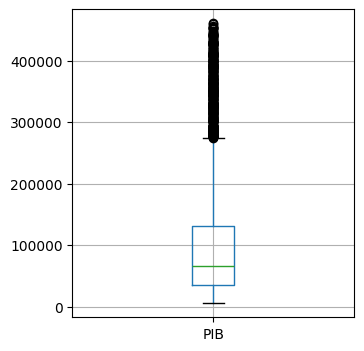

In [118]:
# apenas outliers segundo IQR
dataout_iqr = data[   (data['PIB'] < Q1-(IQR*1.5)) 
                    | (data['PIB'] > Q3+(IQR*1.5))]

# apenas inliers segundo IQR
dc_iqr = data[(data['PIB'] >= Q1-(IQR*1.5)) 
            & (data['PIB'] <= Q3+(IQR*1.5))]

plt.figure(figsize=(8,4))
plt.subplot(121); dc_iqr.boxplot(['PIB'])


In [131]:
data[data['PIB'] > (IQR*5)+Q3].count()[0]

C:\Users\feh_s\AppData\Local\Temp\ipykernel_17816\3220741995.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[data['PIB'] > (IQR*5)+Q3].count()[0]


382

In [132]:
# selecionando segundo o Pop_est_2009
Q1 = data['Pop_est_2009'].quantile(0.25)
Q3 = data['Pop_est_2009'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['Pop_est_2009'].std()
media = data['Pop_est_2009'].mean()
mediana = data['Pop_est_2009'].median()

print("mediana = %.2f, IQR = %.2f" % (mediana, IQR))
print("media   = %.2f, desvio padrao = %.2f" % (media, desvp))

mediana = 11200.00, IQR = 17934.00
media   = 34408.00, desvio padrao = 201768.00


<Axes: >

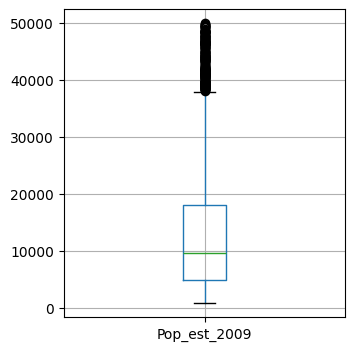

In [133]:
# apenas outliers segundo IQR
dataout_iqr = data[   (data['Pop_est_2009'] < Q1-(IQR*1.5)) 
                    | (data['Pop_est_2009'] > Q3+(IQR*1.5))]

# apenas inliers segundo IQR
dc_iqr = data[(data['Pop_est_2009'] >= Q1-(IQR*1.5)) 
            & (data['Pop_est_2009'] <= Q3+(IQR*1.5))]

plt.figure(figsize=(8,4))
plt.subplot(121); dc_iqr.boxplot(['Pop_est_2009'])

In [134]:
data[data['Pop_est_2009'] > (IQR*5)+Q3].count()[0]

C:\Users\feh_s\AppData\Local\Temp\ipykernel_17816\2216341867.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[data['Pop_est_2009'] > (IQR*5)+Q3].count()[0]


233

In [138]:
data['estimat_pop_desemprego'] = data['estimat_pop_desemprego'].replace('#VALUE!')
data['estimat_pop_desemprego'].astype(int)

ValueError: invalid literal for int() with base 10: '#VALUE!'

In [135]:
# selecionando segundo o Pop_est_2009
Q1 = data['estimat_pop_desemprego'].quantile(0.25)
Q3 = data['estimat_pop_desemprego'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['estimat_pop_desemprego'].std()
media = data['estimat_pop_desemprego'].mean()
mediana = data['estimat_pop_desemprego'].median()

print("mediana = %.2f, IQR = %.2f" % (mediana, IQR))
print("media   = %.2f, desvio padrao = %.2f" % (media, desvp))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

---

### Questão 4)

Inicie com os seguintes passos:
1. calcule e imprima a média e a mediana dos valores na coluna 'desemprego', arredondando para 4 casas decimais,
2. converta todos os valores da coluna 'UF' para caixa alta (dica: usar a função `upper()` para essa tarefa),
3. calcule e anote o total de valores faltantes na variável 'desemprego' para cada 'UF' distinta.

Em contato com a equipe especialista, fomos informados que uma boa forma de preencher esses valores seria o preenchimento pela mediana do desemprego no estado referente ao dado faltante. Assim, iremos preencher os valores `nan` de 'desemprego' com as medianas agrupadas por 'UF'. 

Para isso codifique uma função que deverá:
1. calcular a mediana de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto de uma variável categórica B que se deseja usar para agrupar; no nosso caso A='desemprego' e B='UF';
2. atribuir a mediana calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. garantir que o valor atribuido tenha o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,2)`

Realize o preenchimento dos dados faltantes utilizando o método da mediana agrupada por UF. A seguir, comute novamente e imprima a média e a mediana dos valores na coluna 'desemprego' agora preenchida, arredondando para 4 casas decimais.

Quantas UFs distintas continham dados faltantes, e qual foi o efeito do preenchimento da variável desemprego na média e na mediana (arredondadas para 4 casas decimais) da variável desemprego (em outras palavras, essas estatísticas reduziram, se mantiveram ou aumentaram após a transformação)?

(a) 5 UFs, a média reduziu, a mediana se manteve<br>
(b) 5 UFs, a média aumentou, a mediana se manteve<br>
(c) 6 UFs, a média reduziu, a mediana reduziu<br>
(d) 6 UFs, a média aumentou, a mediana aumentou<br>
(e) 6 UFs, a média aumentou, a mediana se manteve<br>


---

### Questão 5)

Desejamos projetar um algoritmo para, por meio dos atributos de entrada 'PIB', 'Pop_est_2009', 'desemprego', classificar se um município pertence à classes 1/2/3, ou pertence à classes 4/5. Realize os seguintes passos:

1. gere um rótulo/label binário, que é `0` para municípios cujo atributo classe seja 1, 2 ou 3, e o rótulo `1` para municípios de classe 4 ou 5;
2. Converta a coluna Pop_est_2009 para numérico, com opção `downcast='integer', errors='coerce'` para tornar faltante (nan) os não convertidos corretamente.
3. preencha todos os atributos faltantes da base de dados com o valor `-1`;
4. prepare a base de dados de treinamento `X` contendo apenas as colunas 'PIB', 'Pop_est_2009', 'desemprego', e os rótulos `y` binários conforme passo 1, de forma a ser aceito como entrada nas bibliotecas `sklearn` e `imblearn`;
5. gere uma nova base de dados rebalanceada `Xs` e `ys` por meio do método `under_sampling.RandomUnderSampler(random_state=1)` e usando como estratégia subamostrar a classe majoritária a um tamanho proporcional a 3 vezes o tamanho da classe minoritária de forma que fiquem com uma relação 1:3; 
6. treine o classificador 1 do tipo `DecisionTreeClassifier(max_depth=3, random_state=1)` nos dados originais `X`, `y`, e verifique a acurácia balanceada na predição do conjunto de treinamento `X`, i.e. gerando `y_pred = classif1.predict(X)` e computando `balanced_accuracy_score(y, y_pred)`; 
7. treine um novo classificador 2 do tipo `DecisionTreeClassifier(max_depth=3,  random_state=1)` nos dados rebalanceados: `Xs`, `ys`, e verifique a acurácia balanceada na predição no conjunto de treinamento `X`, i.e. gerando `y_pred_s = classif2.predict(X)` e computando `balanced_accuracy_score(y, y_pred_s)`. 

OBS: as duas acurácias são computadas no mesmo conjunto `X` relativo ao conjunto de treinamento original.

Em que intervalo recaem as acurácias balanceadas medidas no conjunto **de treinamento** resultantes do classificador 1 (treinado com dados originais) e do classificador 2 (treinado com dados amostrados)? 

(a) Classificador 1: [65%, 72%],  Classificador 2: [65%, 72%] <br>
(b) Classificador 1: [65%, 72%],  Classificador 2: [85%, 90%] <br>
(c) Classificador 1: [65%, 72%],  Classificador 2: [92%, 98%] <br>
(d) Classificador 1: [76%, 81%],  Classificador 2: [76%, 81%] <br>
(e) Classificador 1: [76%, 81%],  Classificador 2: [85%, 90%] <br>
